<a href="https://colab.research.google.com/github/Bhargavvv412/CNN/blob/main/CNN_Pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-01 18:12:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.250.4.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.7s    

2025-04-01 18:12:10 (18.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls os.walk()/train

pizza  steak


In [ ]:
# !ls pizza_steak/train/steak

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
   print(f"there are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}' .")

there are 2 directories and 0 images in'pizza_steak' .
there are 2 directories and 0 images in'pizza_steak/train' .
there are 0 directories and 750 images in'pizza_steak/train/pizza' .
there are 0 directories and 750 images in'pizza_steak/train/steak' .
there are 2 directories and 0 images in'pizza_steak/test' .
there are 0 directories and 250 images in'pizza_steak/test/pizza' .
there are 0 directories and 250 images in'pizza_steak/test/steak' .


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr  1 18:12 .
drwxr-xr-x 1 root root 4096 Apr  1 18:12 ..
drwxr-xr-x 4 root root 4096 Apr  1 18:12 test
drwxr-xr-x 4 root root 4096 Apr  1 18:12 train


In [ ]:
import pathlib
import numpy as np
data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  img= mpimg.imread(target_folder+"/"+random_image[0])
  plt.axis("off")
  plt.imshow(img)

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


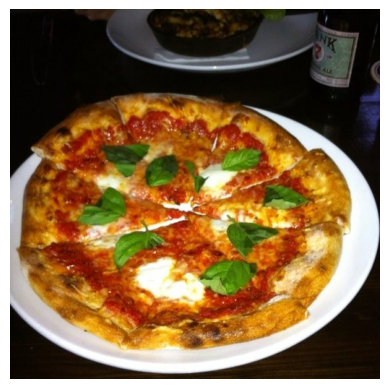

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class="pizza")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  zca_whitening=True,
                                  width_shift_range= 1,
                                  height_shift_range=1,
                                  brightness_range=(0,5),
                                  fill_mode="nearest",
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  validation_split=0.1,
                                  )
test_datagen = ImageDataGenerator(rescale=1./255,
                                  zca_whitening=True,
                                  width_shift_range= 1,
                                  height_shift_range=1,
                                  brightness_range=(0,5),
                                  fill_mode="nearest",
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  validation_split=0.1,
                                  )

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(256, 256),
    class_mode="binary"
)

valid_data=test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    shuffle=True,
    seed=42,
    target_size=(256, 256),
    class_mode="binary"
)


model_1 = Sequential([
    tf.keras.layers.Conv2D(
        filters=20,
        kernel_size=3,
        activation='relu',
        padding="same",
        input_shape=(256, 256, 3),
        bias_initializer="zeros"),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=4,
        activation='relu',
        padding="same",
        input_shape=(256, 256, 3),
        bias_initializer="zeros"),
    tf.keras.layers.Conv2D(
        filters=5,
        kernel_size=5,
        activation='relu',
        padding="same",
        input_shape=(256, 256, 3),
        bias_initializer="zeros"),

    tf.keras.layers.MaxPool2D(
        pool_size=3,
        strides=(3,3),
        padding="valid"),

    tf.keras.layers.Conv2D(
        filters=5,
        kernel_size=5,
        activation='relu',
        padding="same",
        input_shape=(256, 256, 3),
        bias_initializer="zeros"),

    tf.keras.layers.Conv2D(
        filters=5,
        kernel_size=5,
        activation='relu',
        padding="same",
        input_shape=(256, 256, 3),
        bias_initializer="zeros"),

    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=(3,3),
        padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        1,
        activation="sigmoid",
        use_bias=True,
        bias_initializer="zeros",)
])


model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1047: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocess

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.4921 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.5133 - loss: 0.6882 - val_accuracy: 0.6760 - val_loss: 0.6312
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.6827 - loss: 0.6089 - val_accuracy: 0.6500 - val_loss: 0.5777
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.7098 - loss: 0.5735 - val_accuracy: 0.7780 - val_loss: 0.5256
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.6904 - loss: 0.5815 - val_accuracy: 0.7480 - val_loss: 0.5314
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.7157 - loss: 0.5614 - val_accuracy: 0.7660 - val_loss: 0.5076
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.7115 - loss: 0.5687 - val_accuracy: 0.7280 - val_loss: 0.5324
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.7320 - loss: 0.5407 - val_accurac

In [ ]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 256, 256, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 256, 256, 10)        │           3,210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 256, 256, 5)         │           1,255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 85, 85, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 85, 85, 5)           │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 85, 85, 5)           │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           3,921 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,620 (119.61 KB)

 Trainable params: 10,206 (39.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,414 (79.75 KB)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256, 256),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(256, 256),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Use Python's built-in next() function to get the next batch
images, labels = next(train_data)

# Check the length of the batch
print(f"Number of images in batch: {len(images)}")
print(f"Number of labels in batch: {len(labels)}")

Number of images in batch: 32
Number of labels in batch: 32


In [ ]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

<Axes: >

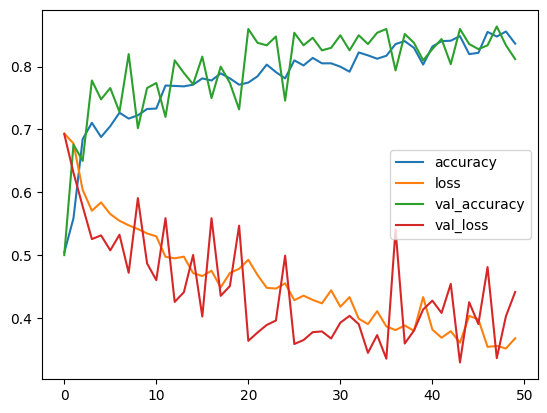

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
def load_and_prep_image(filename, img_shape=256):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


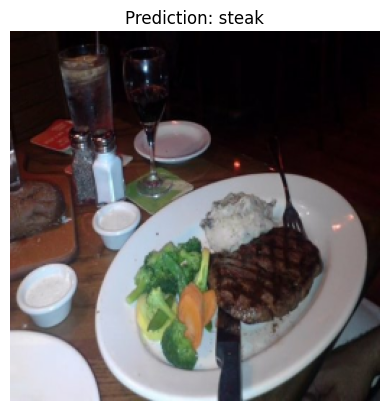

In [ ]:
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_1, "/content/pizza_steak/train/steak/1126126.jpg", class_names)